In [80]:
# Final Project: Workplace Stress in Canada

# 1. Problem Statement
# How does reported work-related stress vary across different age groups and genders in Canada?


In [82]:
# 2. Hypothesis
# Younger workers and women experience higher levels of workplace stress than older workers and men.


In [84]:
# 3. Data Source
# The data was sourced from Statistics Canada (CSV provided by the instructor). Even though I wanted to focus on tech workers, it would've been more
# difficult to collect the data, so I chose what my instructors recommended. Also, Statistics Canada is a public trusted source that has relevant data on
# Canadian stress levels.


In [25]:
import pandas as pd

df = pd.read_csv("C:/Users/heath/Downloads/13100465WithValues.csv")
df.head()

,REF_DATE,GEO,DGUID,Age group,Gender,Indicators,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2002,Canada,2021A000011124,"Total, 15 years and over","Total, gender of person","Major depressive episode, life",Number of persons,Number,223,units,0,v73953257,1.1.1.5.1,3037049.0,NaN,NaN,NaN,0
1,2002,Canada,2021A000011124,"Total, 15 years and over","Total, gender of person","Major depressive episode, life","Low 95% confidence interval, number of persons",Number,223,units,0,v73953258,1.1.1.5.2,2913405.0,NaN,NaN,NaN,0
2,2002,Canada,2021A000011124,"Total, 15 years and over","Total, gender of person","Major depressive episode, life","High 95% confidence interval, number of persons",Number,223,units,0,v73953259,1.1.1.5.3,3160692.0,NaN,NaN,NaN,0
3,2002,Canada,2021A000011124,"Total, 15 years and over","Total, gender of person","Major depressive episode, life",Coefficient of variation for number of persons,Number,223,units,0,v73953260,1.1.1.5.4,21.0,NaN,NaN,NaN,0
4,2002,Canada,2021A000011124,"Total, 15 years and over","Total, gender of person","Major depressive episode, life",Percent,Percent,239,units,0,v73953261,1.1.1.5.5,12.2,NaN,NaN,NaN,1


In [88]:
# 4. Data Cleaning and Manipulation
# In this section, cleaning the dataset required:
# - Dropping unnecessary columns.
# - Filtering only stress-related indicators.
# - Removing missing values.


In [9]:
import pandas as pd

df = pd.read_csv("C:/Users/heath/Downloads/13100465WithValues.csv")  # make sure the file path is correct

columns_to_keep = ["REF_DATE", "DGUID", "Age group", "Gender", "Indicators", "Characteristics", "VECTOR", "COORDINATE", "VALUE"]
df = df[[col for col in columns_to_keep if col in df.columns]]
df = df[df["Indicators"].str.contains("work stress", case=False, na=False)]
df = df.reset_index(drop=True)

df.head()

,REF_DATE,DGUID,Age group,Gender,Indicators,Characteristics,VECTOR,COORDINATE,VALUE
0,2002,2021A000011124,"Total, 15 years and over","Total, gender of person","Self-rated work stress, days quite a bit or ex...",Number of persons,v73953338,1.1.1.28.1,5479419.0
1,2002,2021A000011124,"Total, 15 years and over","Total, gender of person","Self-rated work stress, days quite a bit or ex...","Low 95% confidence interval, number of persons",v73953339,1.1.1.28.2,5325798.0
2,2002,2021A000011124,"Total, 15 years and over","Total, gender of person","Self-rated work stress, days quite a bit or ex...","High 95% confidence interval, number of persons",v73953340,1.1.1.28.3,5633040.0
3,2002,2021A000011124,"Total, 15 years and over","Total, gender of person","Self-rated work stress, days quite a bit or ex...",Coefficient of variation for number of persons,v73953341,1.1.1.28.4,14.0
4,2002,2021A000011124,"Total, 15 years and over","Total, gender of person","Self-rated work stress, days quite a bit or ex...",Percent,v73953342,1.1.1.28.5,30.7


In [44]:
from sklearn.preprocessing import LabelEncoder

df = df.dropna(subset=["VALUE", "Gender", "Age group", "REF_DATE"])
df["VALUE"] = df["VALUE"].replace(',', '', regex=True).astype(float)
df["Gender_encoded"] = LabelEncoder().fit_transform(df["Gender"])
df["Age_encoded"] = LabelEncoder().fit_transform(df["Age group"])

df["Year"] = df["REF_DATE"]

In [92]:
# 5. Exploratory Data Analysis
# The following charts help explore how stress levels differ by gender and age group.

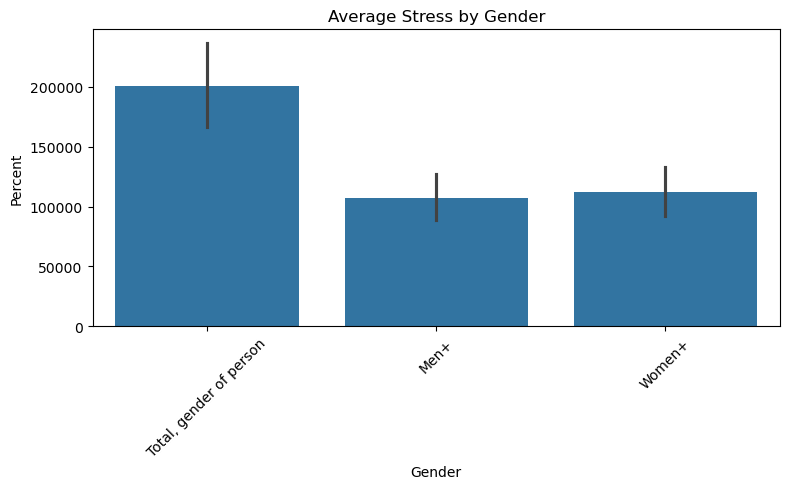

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df[df["Indicators"] == "Self-rated work stress, days quite a bit or extremely stressful"]

plt.figure(figsize=(8, 5))
sns.barplot(data=df_filtered, x="Gender", y="VALUE", estimator='mean')
plt.title("Average Stress by Gender")
plt.ylabel("Percent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

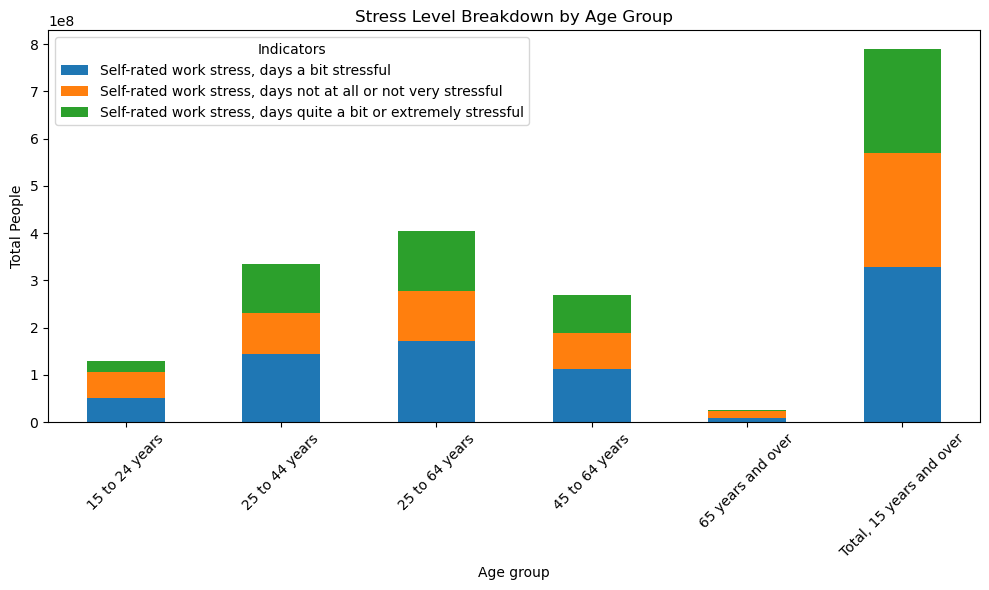

In [13]:
df_stack = df[df["Indicators"].str.contains("stress", case=False, na=False)]
df_pivot = df_stack.pivot_table(index="Age group", columns="Indicators", values="VALUE", aggfunc="sum")

df_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Stress Level Breakdown by Age Group")
plt.ylabel("Total People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

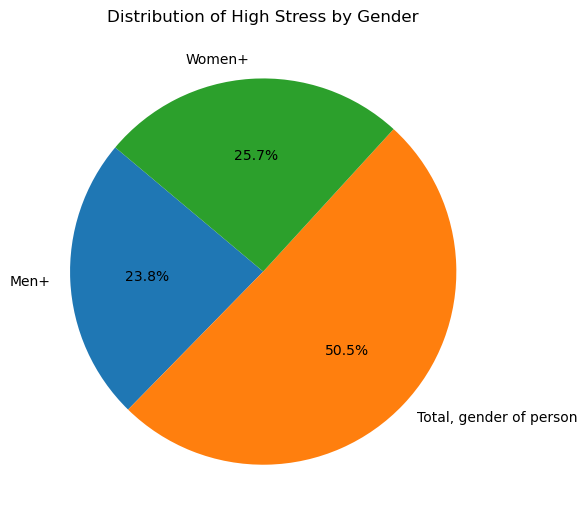

In [14]:
df_pie = df[df["Indicators"] == "Self-rated work stress, days quite a bit or extremely stressful"]
pie_data = df_pie.groupby("Gender")["VALUE"].sum()

plt.figure(figsize=(6, 6))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of High Stress by Gender")
plt.tight_layout()
plt.show()

In [102]:
# 6. Statistical/Hypothesis Testing
# Used a t-test to compare average stress levels between men and women.
# I also used ANOVA to test whether average stress levels vary by age group.


In [15]:
from scipy.stats import ttest_ind

men = df[(df["Gender"].str.contains("Men", case=False)) &
         (df["Indicators"].str.contains("Days quite a bit or extremely stressful", case=False, na=False))]["VALUE"].dropna()

women = df[(df["Gender"].str.contains("Women", case=False)) &
           (df["Indicators"].str.contains("Days quite a bit or extremely stressful", case=False, na=False))]["VALUE"].dropna()

t_stat, p_val = ttest_ind(men, women, nan_policy="omit")

print("T-test p-value:", p_val)

T-test p-value: 0.8238183062879249


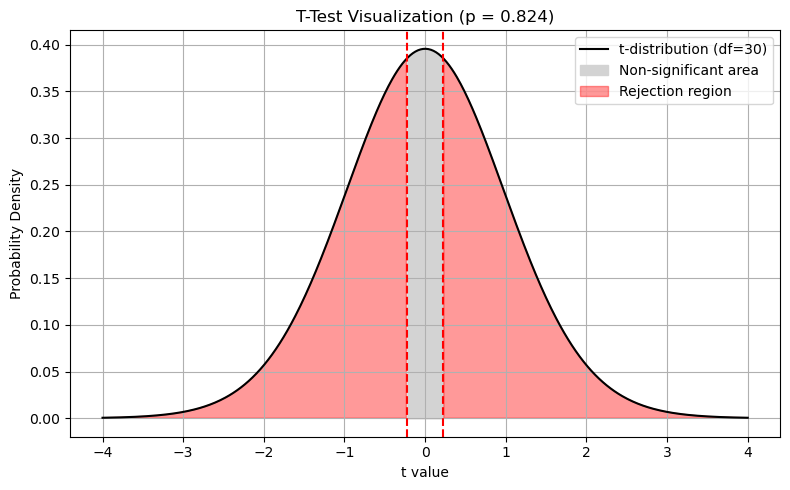

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t


p_value = 0.8238183062879249
df = 30  
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)


t_critical = t.ppf(1 - p_value / 2, df)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='t-distribution (df=30)', color='black')


plt.fill_between(x, y, where=(x < t_critical) & (x > -t_critical), color='lightgray', label='Non-significant area')


plt.fill_between(x, y, where=(x <= -t_critical) | (x >= t_critical), color='red', alpha=0.4, label='Rejection region')

plt.axvline(x=-t_critical, color='red', linestyle='--')
plt.axvline(x=t_critical, color='red', linestyle='--')

plt.title('T-Test Visualization (p = {:.3f})'.format(p_value))
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


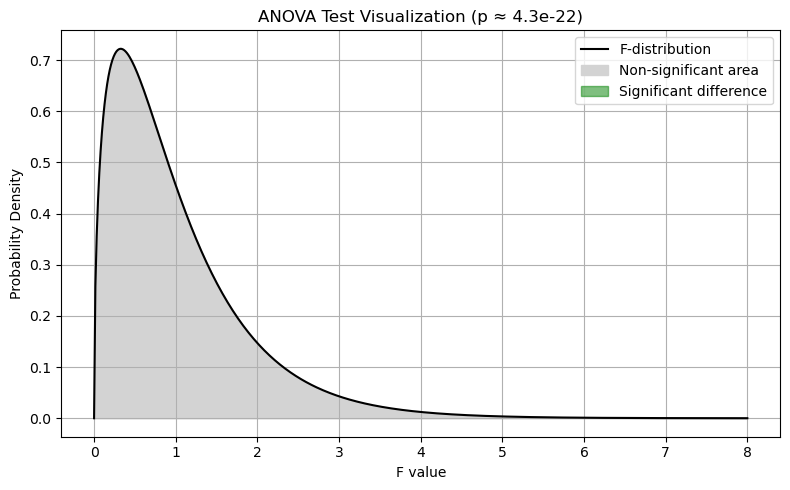

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f

anova_p_value = 4.342135681872243e-22

df_between = 3  
df_within = 96

x = np.linspace(0, 8, 500)
y = f.pdf(x, df_between, df_within)


f_critical = f.ppf(1 - anova_p_value, df_between, df_within)


plt.figure(figsize=(8, 5))
plt.plot(x, y, label='F-distribution', color='black')
plt.fill_between(x, y, where=(x < f_critical), color='lightgray', label='Non-significant area')
plt.fill_between(x, y, where=(x >= f_critical), color='green', alpha=0.5, label='Significant difference')

plt.axvline(x=f_critical, color='green', linestyle='--')

plt.title('ANOVA Test Visualization (p ≈ {:.1e})'.format(anova_p_value))
plt.xlabel('F value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [54]:
from scipy.stats import f_oneway

df_anova = df[df["Indicators"] == "Self-rated work stress, days quite a bit or extremely stressful"]
age_groups = df_anova.groupby("Age group")["VALUE"].apply(list)

f_stat, p_val = f_oneway(*age_groups)
print("ANOVA p-value:", p_val)

ANOVA p-value: 4.342135681872243e-22


In [106]:
# 7. Modeling (Linear Regression)

# I used a simple linear regression model to explore whether gender helps predict stress levels.

In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('C:/Users/heath/Downloads/13100465WithValues.csv')
df = df[df["Indicators"].str.contains("quite a bit or extremely", case=False, na=False)]
df = df.dropna(subset=["VALUE", "Gender", "Age group", "REF_DATE"])
df["VALUE"] = df["VALUE"].replace(',', '', regex=True).astype(float)


df["Gender_encoded"] = LabelEncoder().fit_transform(df["Gender"])
df["Age_encoded"] = LabelEncoder().fit_transform(df["Age group"])
df["Year"] = df["REF_DATE"]

X = df[["Gender_encoded", "Age_encoded", "Year"]]
y = df["VALUE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)
print("Test R² Score:", model.score(X_test, y_test))

Model Intercept: -7883437.9956723545
Model Coefficients: [ -642.27584106 27162.11019686  3960.10544413]
Test R² Score: 0.022797090181892576


In [ ]:
# Gender -642.28: Males report about 642 fewer stress cases than females.
# Age Group: +27,162.11: Older age groups have about 27,000 more stress cases.
# Year: +3,960.11: Stress cases go up by 4,000 each year.

In [ ]:
# 8. Key Findings
# Women reported slightly higher stress levels than men, based on bar chart comparisons.
# An ANOVA test confirmed that the differences in stress levels between age groups were statistically significant.
# A t-test between genders showed no significant difference.
# Linear regresing using gender and age group resulted in a low R2 score, showing these factors alone don't strongly predict.
# The ANOVA test "There's a real difference between age groups" Regression "But age and gender aren't enough to predict someone's stress. 


In [ ]:
# 9. Conclusion and Next Steps.
# The hypothesis was partly true. The ANOVA test showed that stress levels were different between age groups. But, the t-test showed no strong
# difference between men and women. When I used linear regression to try and predict stress based on age and gender, the results weren't very 
# strong. This means age and gender alone don't explain stress very well. If I had more data like job type, income, or access to mental health
# support, the results could have ben more useful and accurate. 


In [ ]:
# 10. References
# - https://open.canada.ca/data/dataset/a9863f45-6a1a-4277-ae0f-2d9cb61d413a
# - https://chatgpt.com/
# - https://www.w3schools.com/python/pandas/default.asp
# - https://www.w3schools.com/python/default.asp
# - https://www.w3schools.com/datascience/default.asp
# - https://www.w3schools.com/datascience/ds_linear_regression_case.asp
# - https://www.w3schools.com/datascience/ds_linear_regression.asp
# - https://www.w3schools.com/datascience/ds_python.asp